In [6]:
import statsmodels.tools.eval_measures as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# 1. Exploratory Analysis

### Population Data

In [13]:
ls

avg_rent_2008-2022.csv               pop_percentage_change_full.csv
corporation_tax_all_years.csv        population_age_all.csv
hap_demographic_dublin.csv           poverty_2006-2019.csv
hap_exits_percentage_statewide.csv   poverty_2020-22.csv
hap_families_dublin.csv              poverty_general_2022.csv
hap_homeless_dublin.csv              poverty_housed_2022.csv
hap_homeless_statewide.csv           social_housing_dublin_2015_2022.csv
homelessness_dublin.csv              social_housing_dublin_electoral.csv
income_inequality_full.csv           young_adults_living_at_home.csv
pop_non_national_full.csv


In [14]:
df = pd.read_csv('./population_age_all.csv')

In [16]:
df.pop('Unnamed: 0')

0      684
1      685
2      686
3      687
4      688
      ... 
280    964
281    965
282    966
283    967
284    968
Name: Unnamed: 0, Length: 285, dtype: int64

In [17]:
df

,year,age group,sex,value
0,2002,All ages,Both sexes,3917203
1,2002,All ages,Male,1946164
2,2002,All ages,Female,1971039
3,2002,0 - 4 years,Both sexes,277630
4,2002,0 - 4 years,Male,142040
...,...,...,...,...
280,2022,80 - 84 years,Male,43588
281,2022,80 - 84 years,Female,52998
282,2022,85 years and over,Both sexes,84441
283,2022,85 years and over,Male,31607


In [19]:
df = df[df['sex'] == 'Both sexes']
df.pop('sex')

0      Both sexes
3      Both sexes
6      Both sexes
9      Both sexes
12     Both sexes
          ...    
270    Both sexes
273    Both sexes
276    Both sexes
279    Both sexes
282    Both sexes
Name: sex, Length: 95, dtype: object

In [77]:
df.to_csv('./population_age_all.csv')

In [32]:
df['age group'].unique()

array(['All ages', '0 - 4 years', '5 - 9 years', '10 - 14 years',
       '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years',
       '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years',
       '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years',
       '75 - 79 years', '80 - 84 years', '85 years and over'],
      dtype=object)

In [30]:
df_all = df[df['age group'] == 'All ages']

,year,age group,value
0,2002,All ages,3917203
57,2006,All ages,4239848
114,2011,All ages,4588252
171,2016,All ages,4761865
228,2022,All ages,5149139


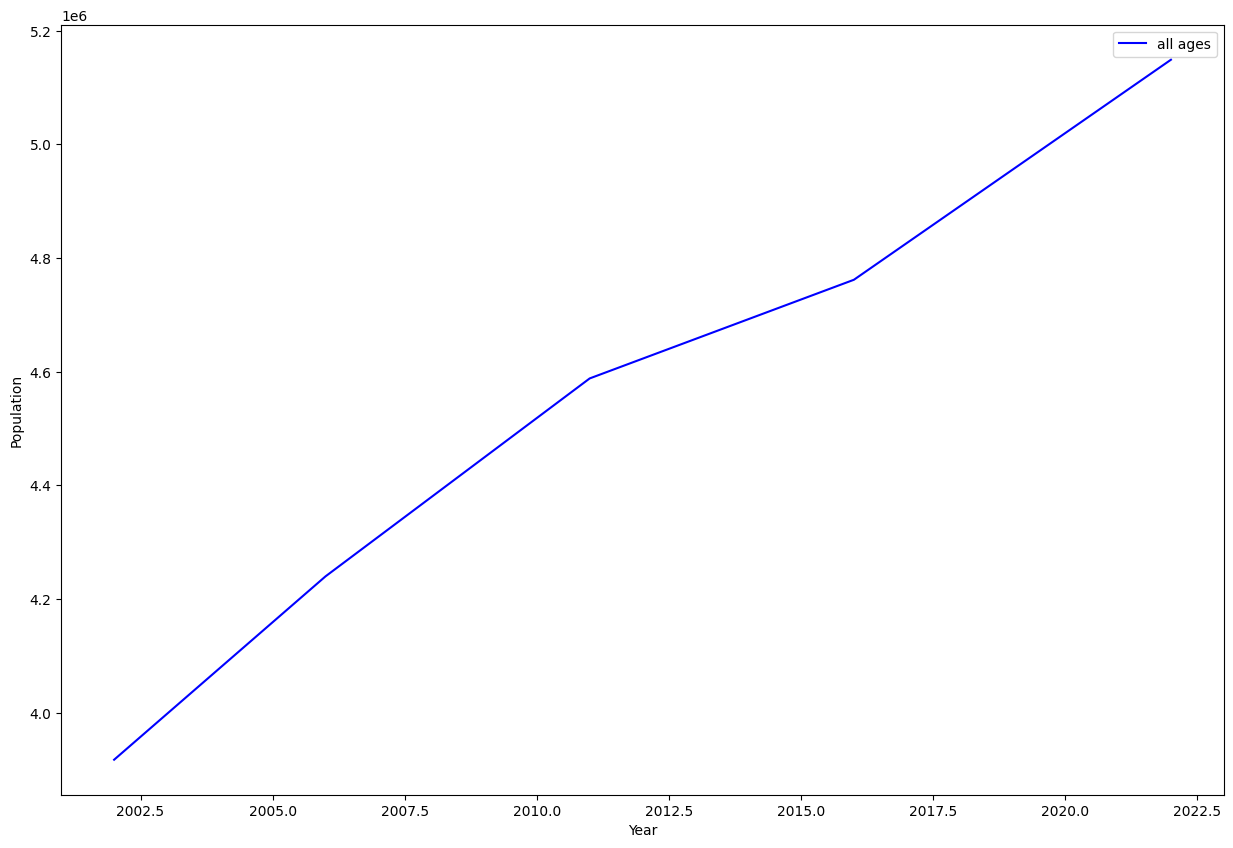

In [57]:
plt.figure(figsize=(15,10))

plt.plot(
df_all['year'],
df_all['value'],
color='blue',
label='all ages')

plt.ylabel('Population')
plt.xlabel('Year')
plt.legend();

In [38]:
df_20_24 = df[df['age group'] == '20 - 24 years']

In [78]:
df_20_24

,year,age group,value
15,2002,20 - 24 years,328334
72,2006,20 - 24 years,342475
129,2011,20 - 24 years,297231
186,2016,20 - 24 years,273636
243,2022,20 - 24 years,307143


In [39]:
df_25_29 = df[df['age group'] == '25 - 29 years']

In [79]:
df_25_29

,year,age group,value
18,2002,25 - 29 years,312693
75,2006,25 - 29 years,373078
132,2011,25 - 29 years,361122
189,2016,25 - 29 years,297435
246,2022,25 - 29 years,295808


In [40]:
df_30_34 = df[df['age group'] == '30 - 34 years']

In [81]:
df_30_34

,year,age group,value
21,2002,30 - 34 years,304676
78,2006,30 - 34 years,349361
135,2011,30 - 34 years,393945
192,2016,30 - 34 years,361975
249,2022,30 - 34 years,332223


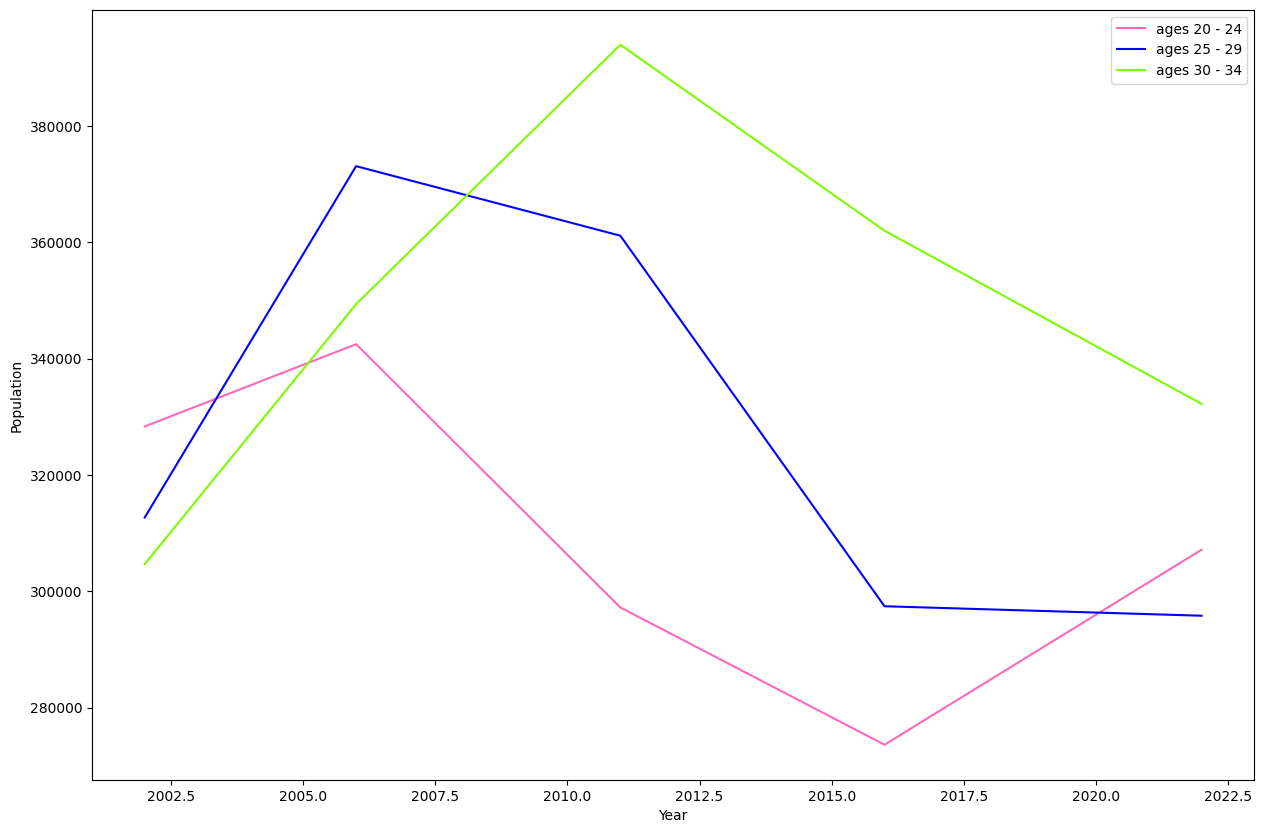

In [49]:
plt.figure(figsize=(15,10))

plt.plot(
df_20_24['year'],
df_20_24['value'],
color='hotpink',
label='ages 20 - 24')

plt.plot(
df_25_29['year'],
df_25_29['value'],
 color='blue',
label='ages 25 - 29')

plt.plot(
df_30_34['year'],
df_30_34['value'],
color='lawngreen',
label='ages 30 - 34')

plt.ylabel('Population')
plt.xlabel('Year')
plt.legend();

In [84]:
df2 = pd.read_csv('./pop_percentage_change_full.csv')
df2

,Unnamed: 0,year,region,population,actual change since previous census,percentage change since previous census
0,0,2002,State,3917203.0,291116.0,8.0
1,1,2002,Carlow,46014.0,4398.0,10.6
2,2,2002,Dublin,1122821.0,64557.0,6.1
3,3,2002,Kildare,163944.0,28952.0,21.4
4,4,2002,Kilkenny,80339.0,5003.0,6.6
...,...,...,...,...,...,...
157,157,2022,Cork City and Cork County,584156.0,41288.0,7.6
158,158,2022,Limerick City and County,209536.0,14637.0,7.5
159,159,2022,Waterford City and County,127363.0,11187.0,9.6
160,160,2022,Galway City,84414.0,5746.0,7.3


In [85]:
df2['region'].unique()

array(['State', 'Carlow', 'Dublin', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork', 'Kerry', 'Limerick', 'Tipperary',
       'Waterford', 'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo',
       'Cavan', 'Donegal', 'Monaghan', 'Dublin City',
       'Dún Laoghaire-Rathdown', 'Fingal', 'South Dublin',
       'Cork City and Cork County', 'Limerick City and County',
       'Waterford City and County', 'Galway City', 'Galway County'],
      dtype=object)

In [83]:
df_all

,year,age group,value
0,2002,All ages,3917203
57,2006,All ages,4239848
114,2011,All ages,4588252
171,2016,All ages,4761865
228,2022,All ages,5149139


In [65]:
df2_dublin = df2.loc[df2['region'] == 'Dublin']
df2_dublin.sort_values(by='year', ascending=False)

,Unnamed: 0,year,region,population,actual change since previous census,percentage change since previous census
110,110,2022,Dublin,1458154.0,110795.0,8.2
83,83,2016,Dublin,1347359.0,74290.0,5.8
56,56,2011,Dublin,1273069.0,85893.0,7.2
29,29,2006,Dublin,1187176.0,64355.0,5.7
2,2,2002,Dublin,1122821.0,64557.0,6.1


In [71]:
df2_dublin['population'] = df2_dublin['population'].astype('int64')

/var/folders/fq/w4n1nx9n5flfw6tv_nzn8kyr0000gn/T/ipykernel_43721/2753004935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dublin['population'] = df2_dublin['population'].astype('int64')


In [72]:
df2_dublin['population'] = df2_dublin['actual change since previous census'].astype('int64')

/var/folders/fq/w4n1nx9n5flfw6tv_nzn8kyr0000gn/T/ipykernel_43721/2231768710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dublin['population'] = df2_dublin['actual change since previous census'].astype('int64')


In [73]:
df2_dublin.to_csv('./pop_percentage_change_dublin.csv')

### Economic Data

In [74]:
df_tax = pd.read_csv('./corporation_tax_all_years.csv')

In [75]:
df_tax

,Unnamed: 0,year,total corporation tax revenue
0,0,1995,1458.15
1,1,1996,1813.46
2,2,1997,2154.92
3,3,1998,2614.28
4,4,1999,3442.37
5,5,2000,3885.28
6,6,2001,4143.90
7,7,2002,4803.75
8,8,2003,5155.44
9,9,2004,5335.00


### Homelessness Data

In [90]:
homeless = pd.read_csv('./homelessness_dublin.csv')

In [92]:
homeless[homeless['year'] == 2022]

,Unnamed: 0,year,month,Region,Total Adults,Male Adults,Female Adults,Adults Aged 18-24,Adults Aged 25-44,Adults Aged 45-64,Adults Aged 65+,Number of Families,Number of Adults in Families,Number of Dependants in Families,Number of people with citizenship Irish,Number of people with citizenship EEA/Uk,Number of people with citizenship Non-EEA
36,324,2022,nov,Dublin,"5,655","3,593","2,062",980,"3,011","1,571",93,1134,"1,914","2,549","3,141","1,404",1110
37,333,2022,aug,Dublin,"5,326","3,427","1,899",943,"2,843","1,459",81,1067,"1,789","2,406","3,006","1,309",1011
38,342,2022,jul,Dublin,5209,3359,1850,913,2789,1426,81,1016,1700,2339,2951,1287,971
39,351,2022,jun,Dublin,"5,258","3,416","1,842",934,"2,834",1411,79,990,1661,2274,3002,1318,938
40,360,2022,dec,Dublin,"5,793","3,689","2,104",1010,"3,099","1,595",89,1148,"1,960","2,583","3,175","1,476",1142
41,369,2022,feb,Dublin,"4,711","3,055","1,656",830,"2,543","1,269",69,851,"1,455","1,996",NaN,NaN,NaN
42,378,2022,sep,Dublin,"5,356","3,427","1,929",931,"2,865","1,478",82,"1,081","1,815","2,429","2,992","1,324","1,040"
43,387,2022,may,Dublin,"5,173","3,352","1,821",943,"2,770","1,384",76,972,"1,654","2,259","2,984","1,288",901
44,396,2022,apr,Dublin,"4,991","3,218","1,773",918,"2,666",1340,67,956,1626,2209,2912,1227,852
45,405,2022,oct,Dublin,"5,558","3,526","2,032",959,"2,975","1,542",82,1120,"1,885","2,529","3,090","1,377",1091


### Poverty Profile

In [49]:
ls

Pivot Tables/                     poverty_employ_2006_2019.csv
Raw Data/                         poverty_employ_2020_2022.csv
poverty_age_2006_2019.csv         poverty_household_2006_2019.csv
poverty_age_2020_2022.csv         poverty_household_2020_2022.csv
poverty_econ_2006_2019.csv        poverty_percentage_2004_2019.csv
poverty_econ_2020_2022.csv        poverty_rate_age_2008-2019.csv
poverty_edu_2006_2019.csv         poverty_tenure_2006_2019.csv
poverty_edu_2020_2022.csv         poverty_tenure_2020_2022.csv


In [56]:
econ1 = pd.read_csv('./poverty_econ_2006_2019.csv')
econ1

,Unnamed: 0,year,principal economic status,profile of the population,at risk of poverty,deprivation rate,in consistent poverty
0,0,2006,At work,48.1,16.1,NaN,9.8
1,1,2006,Unemployed,3.2,8.3,NaN,10.9
2,2,2006,Student,8.7,15.0,NaN,14.4
3,3,2006,Engaged on home duties,13.1,18.4,NaN,16.8
4,4,2006,Retired from employment,6.7,5.8,NaN,3.2
...,...,...,...,...,...,...,...
93,93,2019,Student,7.3,10.6,6.8,6.9
94,94,2019,Engaged on home duties,6.8,13.4,10.2,13.7
95,95,2019,Retired from employment,11.9,9.9,6.0,4.3
96,96,2019,Unable to work due to permanent sickness/disab...,3.8,12.3,10.1,13.9


In [57]:
econ1.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
      ..
93    93
94    94
95    95
96    96
97    97
Name: Unnamed: 0, Length: 98, dtype: int64

In [58]:
econ2 = pd.read_csv('./poverty_econ_2020_2022.csv')
econ2

,Unnamed: 0,year,principal economic status,at risk of poverty,at risk of poverty rate after rent and mortgage interest
0,0,2020,Employed,6.5,10.4
1,1,2020,Unemployed,33.2,45.7
2,2,2020,Retired,9.8,12.6
3,3,2020,Unable to work due to long-standing health pro...,33.4,46.6
4,4,2020,"Student, pupil",20.3,25.1
5,5,2020,Fulfilling domestic tasks,20.7,30.1
6,6,2021,Employed,4.4,8.9
7,7,2021,Unemployed,23.2,41.0
8,8,2021,Retired,11.8,15.2
9,9,2021,Unable to work due to long-standing health pro...,39.1,53.8


In [59]:
econ2.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
Name: Unnamed: 0, dtype: int64

In [62]:
econ_full = econ1.merge(econ2, how='outer', on=['year', 'principal economic status', 'at risk of poverty'])
econ_full                                           

,year,principal economic status,profile of the population,at risk of poverty,deprivation rate,in consistent poverty,at risk of poverty rate after rent and mortgage interest
0,2006,At work,48.1,16.1,NaN,9.8,NaN
1,2006,Unemployed,3.2,8.3,NaN,10.9,NaN
2,2006,Student,8.7,15.0,NaN,14.4,NaN
3,2006,Engaged on home duties,13.1,18.4,NaN,16.8,NaN
4,2006,Retired from employment,6.7,5.8,NaN,3.2,NaN
...,...,...,...,...,...,...,...
111,2022,Unemployed,NaN,35.6,NaN,NaN,61.8
112,2022,Retired,NaN,19.1,NaN,NaN,22.1
113,2022,Unable to work due to long-standing health pro...,NaN,35.2,NaN,NaN,51.5
114,2022,"Student, pupil",NaN,13.7,NaN,NaN,21.8


In [63]:
econ_full.to_csv('./poverty_econ_full.csv')

In [64]:
edu1 = pd.read_csv('./poverty_edu_2006_2019.csv')
edu1

,Unnamed: 0,year,highest level of education completed,profile of the population,at risk of poverty,deprivation rate,in consistent poverty
0,0,2006,Primary or below,17.2,26.1,NaN,27.0
1,1,2006,Lower secondary,15.6,18.8,NaN,17.4
2,2,2006,Upper secondary,19.9,16.4,NaN,13.4
3,3,2006,Third level non-degree,6.1,3.5,NaN,2.1
4,4,2006,Third level degree or higher,11.8,2.3,NaN,1.3
...,...,...,...,...,...,...,...
93,93,2019,Upper secondary,16.4,16.4,18.9,17.5
94,94,2019,Third level non-degree,10.5,7.0,7.1,5.3
95,95,2019,Third level degree or higher,18.4,4.3,5.5,2.6
96,96,2019,Other,0.7,1.1,1.5,2.1


In [66]:
edu1.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
      ..
93    93
94    94
95    95
96    96
97    97
Name: Unnamed: 0, Length: 98, dtype: int64

In [67]:
edu2 = pd.read_csv('./poverty_edu_2020_2022.csv')
edu2

,Unnamed: 0,year,highest level of education completed,at risk of poverty,at risk of poverty rate after rent and mortgage interest
0,0,2020,Primary or below,18.0,26.9
1,1,2020,Lower secondary,18.6,25.0
2,2,2020,Upper secondary,15.2,19.8
3,3,2020,Third level non-degree,10.0,16.1
4,4,2020,Third level degree or higher,6.4,10.5
5,5,2020,Post leaving certificate,15.2,21.8
6,6,2021,Primary or below,24.8,32.3
7,7,2021,Lower secondary,19.4,27.9
8,8,2021,Upper secondary,12.4,19.8
9,9,2021,Third level non-degree,5.8,11.5


In [68]:
edu2.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
Name: Unnamed: 0, dtype: int64

In [69]:
edu_full = edu1.merge(edu2, how='outer', on=['year', 'highest level of education completed', 'at risk of poverty'])
edu_full

,year,highest level of education completed,profile of the population,at risk of poverty,deprivation rate,in consistent poverty,at risk of poverty rate after rent and mortgage interest
0,2006,Primary or below,17.2,26.1,NaN,27.0,NaN
1,2006,Lower secondary,15.6,18.8,NaN,17.4,NaN
2,2006,Upper secondary,19.9,16.4,NaN,13.4,NaN
3,2006,Third level non-degree,6.1,3.5,NaN,2.1,NaN
4,2006,Third level degree or higher,11.8,2.3,NaN,1.3,NaN
...,...,...,...,...,...,...,...
111,2022,Lower secondary,NaN,22.6,NaN,NaN,33.2
112,2022,Upper secondary,NaN,11.4,NaN,NaN,20.4
113,2022,Third level non-degree,NaN,12.3,NaN,NaN,19.5
114,2022,Third level degree or higher,NaN,4.1,NaN,NaN,9.1


In [70]:
edu_full.to_csv('./poverty_edu_full.csv')

In [71]:
employ1 = pd.read_csv('./poverty_employ_2006_2019.csv')
employ1

,Unnamed: 0,year,number of persons employed,profile of the population,at risk of poverty,deprivation rate,in consistent poverty
0,0,2006,No person,20.9,55.0,NaN,68.2
1,1,2006,1 person,29.6,30.2,NaN,26.8
2,2,2006,2 persons,34.4,11.0,NaN,5.0
3,3,2006,3 or more persons,15.1,3.8,NaN,0.0
4,4,2007,No person,21.1,56.3,NaN,67.0
5,5,2007,1 person,30.6,27.9,NaN,24.0
6,6,2007,2 persons,35.9,13.1,NaN,9.0
7,7,2007,3 or more persons,12.4,2.7,NaN,0.0
8,8,2008,No person,22.0,50.1,NaN,69.1
9,9,2008,1 person,32.0,34.3,NaN,23.3


In [72]:
employ1.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
Name: Unnamed: 0, dtype: int64

In [73]:
employ2 = pd.read_csv('./poverty_employ_2020_2022.csv')
employ2

,Unnamed: 0,year,number of persons employed,at risk of poverty,at risk of poverty rate after rent and mortgage interest
0,0,2020,No person,29.4,39.4
1,1,2020,1 person,15.6,24.7
2,2,2020,2 persons,4.9,8.0
3,3,2020,3 or more persons,4.0,5.2
4,4,2021,No person,29.0,43.1
5,5,2021,1 person,12.6,21.4
6,6,2021,2 persons,3.0,6.6
7,7,2021,3 or more persons,3.6,5.6
8,8,2022,No person,34.6,45.9
9,9,2022,1 person,15.9,30.5


In [74]:
employ2.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
Name: Unnamed: 0, dtype: int64

In [75]:
employ_full = employ1.merge(employ2, how='outer', on=['year', 'number of persons employed', 'at risk of poverty'])
employ_full

,year,number of persons employed,profile of the population,at risk of poverty,deprivation rate,in consistent poverty,at risk of poverty rate after rent and mortgage interest
0,2006,No person,20.9,55.0,NaN,68.2,NaN
1,2006,1 person,29.6,30.2,NaN,26.8,NaN
2,2006,2 persons,34.4,11.0,NaN,5.0,NaN
3,2006,3 or more persons,15.1,3.8,NaN,0.0,NaN
4,2007,No person,21.1,56.3,NaN,67.0,NaN
...,...,...,...,...,...,...,...
63,2021,3 or more persons,NaN,3.6,NaN,NaN,5.6
64,2022,No person,NaN,34.6,NaN,NaN,45.9
65,2022,1 person,NaN,15.9,NaN,NaN,30.5
66,2022,2 persons,NaN,4.0,NaN,NaN,9.2


In [76]:
employ_full.to_csv('./poverty_employ_full.csv')

In [84]:
rent1 = pd.read_csv('./poverty_tenure_2006_2019.csv')
rent1

,Unnamed: 0,tenure status,year,profile of the population,at risk of poverty,deprivation rate,in consistent poverty
0,0,Owner-occupied,2006,78.0,56.6,NaN,33.8
1,1,Owner-occupied,2007,78.1,53.9,NaN,37.2
2,2,Owner-occupied,2008,76.9,61.4,NaN,41.9
3,3,Owner-occupied,2009,73.7,53.0,NaN,33.8
4,4,Owner-occupied,2010,73.3,57.5,48.0,39.5
5,5,Owner-occupied,2011,68.8,46.8,49.4,38.9
6,6,Owner-occupied,2012,69.6,52.0,51.5,44.4
7,7,Owner-occupied,2013,69.9,50.6,53.0,43.2
8,8,Owner-occupied,2014,68.4,46.4,52.3,40.3
9,9,Owner-occupied,2015,69.3,45.6,49.9,37.1


In [85]:
rent1.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
Name: Unnamed: 0, dtype: int64

In [86]:
rent2 = pd.read_csv('./poverty_tenure_2020_2022.csv')
rent2

,Unnamed: 0,year,tenure status,at risk of poverty,at risk of poverty rate after rent and mortgage interest
0,0,2020,Owner-occupied,7.7,8.8
1,1,2020,Owner-occupied: with outstanding mortgage,5.4,7.7
2,2,2020,Owner-occupied: without outstanding mortgage,9.9,9.9
3,3,2020,Rented or rent free,25.7,43.0
4,4,2020,Rent free,19.2,19.2
5,5,2020,Rented: from Local Authority,38.9,51.6
6,6,2020,Rented: other forms of social housing support,25.9,60.9
7,7,2020,Rented: without housing supports,16.6,31.5
8,8,2021,Owner-occupied,8.2,9.3
9,9,2021,Owner-occupied: with outstanding mortgage,5.2,7.2


In [87]:
rent2.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: Unnamed: 0, dtype: int64

In [88]:
tenure_full = rent1.merge(rent2, how='outer', on=['year', 'tenure status', 'at risk of poverty'])
tenure_full

,tenure status,year,profile of the population,at risk of poverty,deprivation rate,in consistent poverty,at risk of poverty rate after rent and mortgage interest
0,Owner-occupied,2006,78.0,56.6,NaN,33.8,NaN
1,Owner-occupied,2007,78.1,53.9,NaN,37.2,NaN
2,Owner-occupied,2008,76.9,61.4,NaN,41.9,NaN
3,Owner-occupied,2009,73.7,53.0,NaN,33.8,NaN
4,Owner-occupied,2010,73.3,57.5,48.0,39.5,NaN
...,...,...,...,...,...,...,...
58,Rented or rent free,2022,NaN,23.6,NaN,NaN,51.3
59,Rent free,2022,NaN,40.4,NaN,NaN,40.4
60,Rented: from Local Authority,2022,NaN,35.8,NaN,NaN,57.5
61,Rented: other forms of social housing support,2022,NaN,12.7,NaN,NaN,67.6


In [89]:
tenure_full.to_csv('./poverty_tenure_full.csv')

In [90]:
age1 = pd.read_csv('./poverty_age_2006_2019.csv')
age1

,Unnamed: 0,year,age group,profile of the population,at risk of poverty,deprivation rate,in consistent poverty
0,0,2006,0 - 17 years,26.6,34.8,NaN,42.1
1,1,2006,18 - 64 years,62.3,56.3,NaN,54.2
2,2,2006,65 years and over,11.1,8.9,NaN,3.7
3,3,2006,All ages,100.0,100.0,NaN,100.0
4,4,2007,0 - 17 years,27.2,32.7,NaN,39.1
5,5,2007,18 - 64 years,62.0,56.4,NaN,56.6
6,6,2007,65 years and over,10.9,10.9,NaN,4.3
7,7,2007,All ages,100.0,100.0,NaN,100.0
8,8,2008,0 - 17 years,26.1,32.7,NaN,38.7
9,9,2008,18 - 64 years,63.0,58.9,NaN,57.8


In [91]:
age1.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
Name: Unnamed: 0, dtype: int64

In [93]:
age2 = pd.read_csv('./poverty_age_2020_2022.csv')
age2

,Unnamed: 0,year,age group,at risk of poverty,at risk of poverty rate after rent and mortgage interest
0,0,2020,0 - 17 years,16.4,24.8
1,1,2020,18 - 34 years,12.9,19.4
2,2,2020,35 - 49 years,11.2,18.3
3,3,2020,50 - 64 years,14.6,18.0
4,4,2020,65 years and over,9.8,12.9
5,5,2021,0 - 17 years,13.6,23.7
6,6,2021,18 - 34 years,8.7,16.3
7,7,2021,35 - 49 years,10.0,18.9
8,8,2021,50 - 64 years,14.4,18.8
9,9,2021,65 years and over,11.9,15.2


In [94]:
age2.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
Name: Unnamed: 0, dtype: int64

In [95]:
age_full = age1.merge(age2, how='outer', on=['year', 'age group', 'at risk of poverty'])
age_full

,year,age group,profile of the population,at risk of poverty,deprivation rate,in consistent poverty,at risk of poverty rate after rent and mortgage interest
0,2006,0 - 17 years,26.6,34.8,NaN,42.1,NaN
1,2006,18 - 64 years,62.3,56.3,NaN,54.2,NaN
2,2006,65 years and over,11.1,8.9,NaN,3.7,NaN
3,2006,All ages,100.0,100.0,NaN,100.0,NaN
4,2007,0 - 17 years,27.2,32.7,NaN,39.1,NaN
...,...,...,...,...,...,...,...
66,2022,0 - 17 years,NaN,15.2,NaN,NaN,27.7
67,2022,18 - 34 years,NaN,7.8,NaN,NaN,15.8
68,2022,35 - 49 years,NaN,10.7,NaN,NaN,23.2
69,2022,50 - 64 years,NaN,14.6,NaN,NaN,19.2


In [96]:
age_full.to_csv('./poverty_age_full.csv')